# FINAL PROJECT: CS220 Spring 2020
## This is an individual exam. Do not work with a partner! Only change "submitter" netid information. Good luck.
- For majority of the questions you need to replace "# Write your code here" comment with your own code.
- There are 27 questions, each of which will be weighted 0.55 points.
- Unlike projects, you will receive partial credit for a question as long as your code runs and produces an output for each question.
- Unlike projects, you do not have access to "test.py". Instead, you can use "type_test.py". This file does not check if your answers are correct, but it checks if your answers are in the correct format.
- "test.py" will run "lint.py" and deduct points for linting errors. You will lose 0.1 points for each linting error. You will only lose points for warnings, not convention messages (just like in P10). type_test.py does not run the linter, so check with lint.py before turning your work in. For more information about the linter as well as how to run the full linter to see all of the automatically generated advice and feedback, please check out the linting README: https://github.com/msyamkumar/cs220-projects/tree/master/linter.
- General hint: if you see a lot of hints / write up before a question, it is likely to be difficult question.

In [1]:
# project: final
# submitter: xxie65
# partner: none

In [2]:
# Recommended to use this cell to add import statements
import os
from collections import namedtuple
import csv, json
import requests
from bs4 import BeautifulSoup
import sqlite3
import matplotlib
import pandas as pd
#from pandas import DataFrame, Series
%matplotlib inline

In [3]:
# Just run this cell (it's just to make certain text red, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

## Questions q1 to q10 address topics covered by projects P2 to P4.

### Question 1: Is *map_dummy* an *iterable* data structure? 
- Complete the below code to demonstrate this. 
- Your cell should only output either *True* or *False*. 
- You *should not hardcode* the answer to this question.
- Hint: recall how to do nothing in Python.

In [4]:
#q1: Is map_dummy an iterable data structure? True or False

map_dummy = map(str, [4,2,1.0])
try:
    for item in map_dummy:
        map_dummy = map_dummy
    result = True
except TypeError:
    result = False
result

True

### Question 2: Can we use a *list* as a *key in a dictionary*?
- Complete the below code to demonstrate this. 
- Your cell should only output either *True* or *False*. 
- You *should not hardcode* the answer to this question.

In [5]:
#q2: Can we use a list as a key in a dictionary? True or False

try:
    dic = {}
    dic[[1, "1"]] = 1
    result = True
except TypeError:
    result = False
result

False

### Question 3: Complete *falsify* function such that if *bool_list* contains one or more occurences of "False", returned value is False. Otherwise returned value is True. 
- You may add multiple lines of code inside the Falsify function.
- Your code must work with a list of any length!
- Your cell should only output a list containing two boolean values.

In [6]:
#q3: Complete *Falsify* function such that if *bool_list* contains one or more occurences 
#of "False", returned value is False. Otherwise returned value is True. 

def falsify(bool_list):
    if "False" in bool_list:
        return False
    else:
        return True
        
# Test 1
test_list = ["True", "True", "False", "True"]
test_1 = falsify(test_list)

# Test 2
test_list = ["True", "True", "Apple", "True"]
test_2 = falsify(test_list)
[test_1, test_2]

[False, True]

### Use the following *data structure* to answer the next two questions *q4* and *q5*.

In [7]:
Student = namedtuple("Student", ["name", "id"])
data_struct = {
    "cs": [Student("John", "netID123"), Student("Martha", "netID123")],
    "econ": [Student("John", "netID5678_econ"), Student("Peter", "netID5679_econ")]
}

### Question 4: What is the *ID* for *John from Economics*?
- Your cell should only output the ID.

In [8]:
#q4: What is the ID for John from Economics?

data_struct["econ"][0].id

'netID5678_econ'

### Question 5: List the *names* of all students in *CS*.
- Your answer should be in the form of a list.

In [9]:
#q5: List the names of all students in CS.

cs_stu = []
for stu in data_struct["cs"]:
    cs_stu.append(stu.name)
cs_stu

['John', 'Martha']

### Question 6:  Use *list slicing* to right rotate list [1,2,3,4] by three places.
- Hint: When you rotate a list like [1,2,3,4] right by one place, you get [4,1,2,3].
- Your answer should be in the form of a list.

In [10]:
#q6: Use list slicing to right rotate list [1,2,3,4] by three places

original_list = [1,2,3,4]
new_list = original_list[-3:] + original_list[:-3]
new_list

[2, 3, 4, 1]

## Analysing cereal.csv dataset (q7 to q14)
### Write a function that *reads* in the *cereal.csv* file and stores the data as a variable. 
- Make sure to write a generic function that takes csv file as input and returns the data (for reusability)
- Download "cereal.csv" to the same local directory.
- *Do not use any additional path* to your data file - this will *mess up grading*!
- We will be using this variable through the next set of questions (q7 to q15).

In [11]:
# Function to read csv file

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

cr_entire = process_csv("cereal.csv")

### Question 7: What is the *carbohydrate content* in the cereal named "*Cheerios*"? 
- Recall that you shouldn't hardcode the index for looking up a particular column's value.
- Follow the index lookup for all further questions.
- You should make sure to look up the index of the column using the csv header first.
- Your cell should output a float.

In [12]:
#q7: What is the carbohydrate content in the cereal named "Cheerios"?

cr_header = process_csv("cereal.csv")[0]
cr_data = process_csv("cereal.csv")[1:]

for row in cr_entire:
    if row[cr_header.index("name")] == "Cheerios":
        cheerios_carbo = float(row[cr_header.index("carbo")])
cheerios_carbo

17.0

### Question 8: What is the *cereal* with the *highest rating*?
- Report your answer as a dictionary.
- *key* as the *cereal name* and *value* as the *numerical rating*.

In [13]:
#q8: What is the cereal with the highest rating?

highest_rat = {}
highest_r = 0
for row in cr_data:
    rating = float(row[cr_header.index("rating")])
    name = row[cr_header.index("name")]
    if rating > highest_r:
        highest_r = rating
        highest_cr = name
highest_rat[highest_cr] = highest_r
highest_rat     

{'All-Bran with Extra Fiber': 93.704912}

### Question 9: Write *a function* that computes the *mininum, maximum, and average* for a given numerical column of the cereal data and returns these data as a dictionary. Report the basic statistics for the *fat* column.
- Example output: 
```result = {"min": 0.1, "max":5.2, "mean": 2.2}
```

In [14]:
#q9: Write a function that computes the mininum, maximum, and average for a given 
# numerical column of the cereal data and returns these data as a dictionary.
# Report the basic statistics for the fat column.

def find_stats(col_name):
    result = {}
    idx = cr_header.index(col_name)
    mini = None
    maxi = None
    avg = None
    total = 0
    for row in cr_data:
        value = float(row[idx])
        if mini == None or value < mini:
            mini = value
        total += value
        if maxi == None or value > maxi:
            maxi = value
    avg = total/len(cr_data)
    result["min"] = mini
    result["max"] = maxi
    result["mean"] = avg
    return result
        
result = find_stats('fat')
result

{'min': 0.0, 'max': 5.0, 'mean': 1.0129870129870129}

### Question 10: Find the *difference* between the *average sugar content* of all cereals that are rated below 30 and the ones above 50.
- Your cell should output a float value.

In [15]:
#q10: Find the difference between the average sugar content of all cereals 
# that are rated below 30 
# and the ones above 50

avg_sugar_below_30 = 0 
avg_sugar_above_50 = 0

below_30_n = 0
above_50_n = 0
for row in cr_data:
    rating = float(row[cr_header.index("rating")])
    sugar = float(row[cr_header.index("sugars")])
    if rating < 30:
        avg_sugar_below_30 += sugar
        below_30_n += 1
    if rating > 50:
        avg_sugar_above_50 += sugar
        above_50_n += 1

avg_sugar_below_30 = avg_sugar_below_30 / below_30_n
avg_sugar_above_50 = avg_sugar_above_50 / above_50_n

avg_sugar_below_30 - avg_sugar_above_50 # don't change this line

8.783882783882785

## Questions q11 to q14 address topics covered by projects P5 and P6.

### Question 11: How many products are in the cereal dataset?
- Your cell should output an int.

In [16]:
#q11: How many products are in the cereal dataset?

len(cr_data)

77

### Question 12: What is the *product name* in the cereal data that has the *third highest rating*?
- Hints:
   - You need need to re-order your cereal data by ratings.
   - Recall that the typical function you use for re-ordering has a parameter called *key*, which enables you to write a getter function for lookup of specific column value.
- Your cell should output str value.

In [17]:
#q12: What is the product name in the cereal data that has the third highest rating?

def sort_by_rating(row):
    return float(row[cr_header.index("rating")])

sorted(cr_data, key = sort_by_rating, reverse = True)[2][cr_header.index("name")]

'Shredded Wheat spoon size'

### Question 13: What are *product names* that meet the following criteria:
1. *2 ≤ fat ≤ 5*
2. *rating ≥ 30*
3. *100 ≤ sodium ≤ 200*
- Your answer should be a list with the items names (str) sorted in lexicographical order.

In [18]:
#q13: What are product names that meet the following criteria:
   # 2 ≤ fat ≤ 5
   # rating ≥ 30
   # 100 ≤ sodium ≤ 200

names_q13 = []
for row in cr_data:
    name = row[cr_header.index("name")]
    fat = float(row[cr_header.index("fat")])
    rating = float(row[cr_header.index("rating")])
    sodium = float(row[cr_header.index("sodium")])
    if 2 <= fat <= 5:
        if rating >= 30:
            if 100 <= sodium <= 200:
                names_q13.append(name)
sorted(names_q13)

['Almond Delight',
 'Clusters',
 "Cracklin' Oat Bran",
 'Fruit & Fibre Dates; Walnuts; and Oats',
 'Life',
 'Muesli Raisins; Peaches; & Pecans',
 'Mueslix Crispy Blend',
 'Oatmeal Raisin Crisp',
 'Raisin Nut Bran']

### Question 14: Write a function *find_word(keyword)* that returns a list of product names that have *keyword* in the product name.
- Keyword match:
  - should be *case insensitive*
  - should be *complete match (not a substring match)*, with the exception of "'" and "-" (see below example for details)
  - apply split(...) method for handling / eliminating "-" and "'" from the comparsion
  - Hint: this question is all about extracting individual words from the product name and iterating over those words. It is likely that you will need nested loops.
- *Order the list* with the highest rated cereal first and the lowest rated cereal last:
  - Hint: you already did something similar for #q12. Reuse the same getter function here.
- The match result should not consider substring match:
  - Let's say keyword is "Apple", and product names are ["Apple pie", "Apple's seed", "Applewatch", "apple-pay", "apples"].
  - In this example only "Apple pie", "Apple's seed", and "apple-pay" matches with keyword. 
  - "Applewatch" and "apples" are NOT qualified since there are additional letters concatenated to the keyword.

In [19]:
# q14: Write a function find_word(keyword) that returns a list of product names that have 
# keyword in the product name.

def find_word(keyword):
    names = []
    rows = []
    for row in cr_data:
        fullname = row[cr_header.index("name")]
        name_lst1 = fullname.split("-")
        name_lst2 = []
        for item in name_lst1: 
            name_lst2 += item.split("'")
        name_lst3 = []
        for sub in name_lst2:
            name_lst3 += sub.split(" ")
        for pt in name_lst3:
            if keyword == pt:
                rows.append(row)
        new_rows = sorted(rows, key = sort_by_rating, reverse = True)
    for cr in new_rows:
        names.append(cr[0])
    return names

# After creating the function, what is the result of find_word("Wheat")?
find_word("Wheat")

["Shredded Wheat'n'Bran",
 'Shredded Wheat spoon size',
 'Shredded Wheat',
 'Cream of Wheat (Quick)',
 'Puffed Wheat',
 'Nutri-grain Wheat',
 'Frosted Mini-Wheat',
 'Wheat Chex',
 'Crispy Wheat & Raisins']

## Analysing player_data.csv dataset (q15 to q18)
## Questions q15 to q18 address topics covered by project P7.

### Read *player_data.csv* using the csv reading function that you already wrote.
- Download the NBA players dataset "player_data.csv" to the same local directory.
- *Do not use any additional path* to your data file - this will *mess up grading*!
- We will be using this variable through the next set of questions (q15 to q18).
- For all the questions you should *skip all players who have some entries in the column are missing* (i.e., some entry is just the empty string).
- Consider writing a *cell* function to convert appropriate columns into their correct data type!

In [20]:
pl_entire = process_csv("player_data.csv")
pl_header = process_csv("player_data.csv")[0]
pl_data = process_csv("player_data.csv")[1:]

### Question 15 : How many *complete players* in the dataset? 
- Reminder: skip all players who have some entries in the column are missing.
- Hint: answer should be lower than 4550!
- Your cell should output an int.

In [21]:
# q15: How many complete players in the dataset? skip all players who have some entries 
# in the column are missing. i.e. one or more of the entries is the empty string.

complete_pl_data = []
for row in pl_data:
    if not "" in row:
        complete_pl_data += [row]
len(complete_pl_data)

4213

### Question 16: What are the *stats* for the player whose name is "*Michael Jordan*"?
- Answer in the form of a dict. 
- See the example below:
```example = {'name': 'Alaa Abdelnaby',
 'year_start': 1991,
 'year_end': 1995,
 'position': 'F-C',
 'height': '6-10',
 'weight': 240,
 'birth_date': 'June 24, 1968',
 'college': 'Duke University'}```

In [22]:
#q16: What are the stats for the player whose name is "Michael Jordan"?

def stats(colname, cellname):
    mj_stats = {}
    for row in complete_pl_data:
        if row[pl_header.index(colname)] == cellname:
            for colname in pl_header:
                mj_stats[colname] = row[pl_header.index(colname)]
                if colname in ("year_start", "year_end", "weight"):
                    mj_stats[colname] = int(row[pl_header.index(colname)])
    return mj_stats

stats("name", "Michael Jordan")     

{'name': 'Michael Jordan',
 'year_start': 1985,
 'year_end': 2003,
 'position': 'G-F',
 'height': '6-6',
 'weight': 195,
 'birth_date': 'February 17, 1963',
 'college': 'University of North Carolina'}

### Question 17: What are the *stats* for the *players* whose college is *"University of Wisconsin"*?
- Your output should be a list of dictionaries. 
- Each dictionary should be similar to the example in the previous question.
- Hint: consider writing a bucketize function.

In [23]:
#q17: What are the stats for the players whose college is "University of Wisconsin"

def bucketize(keyword, cellname): 
    pl_dict = {}
    for row in complete_pl_data:
        attr = row[pl_header.index(keyword)]
        if attr == cellname: 
            if not attr in pl_dict:
                pl_dict[attr] = []
            pl_dict[attr].append(stats(keyword, cellname))
    return pl_dict

bucketize("college", "University of Wisconsin")['University of Wisconsin']

[{'name': 'Alando Tucker',
  'year_start': 2008,
  'year_end': 2010,
  'position': 'F',
  'height': '6-6',
  'weight': 205,
  'birth_date': 'February 11, 1984',
  'college': 'University of Wisconsin'},
 {'name': 'Alando Tucker',
  'year_start': 2008,
  'year_end': 2010,
  'position': 'F',
  'height': '6-6',
  'weight': 205,
  'birth_date': 'February 11, 1984',
  'college': 'University of Wisconsin'},
 {'name': 'Alando Tucker',
  'year_start': 2008,
  'year_end': 2010,
  'position': 'F',
  'height': '6-6',
  'weight': 205,
  'birth_date': 'February 11, 1984',
  'college': 'University of Wisconsin'},
 {'name': 'Alando Tucker',
  'year_start': 2008,
  'year_end': 2010,
  'position': 'F',
  'height': '6-6',
  'weight': 205,
  'birth_date': 'February 11, 1984',
  'college': 'University of Wisconsin'},
 {'name': 'Alando Tucker',
  'year_start': 2008,
  'year_end': 2010,
  'position': 'F',
  'height': '6-6',
  'weight': 205,
  'birth_date': 'February 11, 1984',
  'college': 'University of Wis

### Question 18: What is the average *weight* for each *position*?
- Answer with a dictionary, mapping the key "position" to the value "average weight" (float type).
- Average is the same as mean.

In [24]:
#q18: What is the average "weight" for each "position"?

def bucketize2(keyword): 
    wt_dict = {}
    for row in complete_pl_data:
        attr = row[pl_header.index(keyword)]
        if not attr in wt_dict:
            wt_dict[attr] = []
        wt_dict[attr].append(row)
    return wt_dict

avg_wt = {}
for pos in bucketize2("position"):
    tot_wt = 0
    for player in bucketize2("position")[pos]:
        tot_wt += int(player[pl_header.index("weight")])
    avg_wt[pos] = tot_wt/len(bucketize2("position")[pos])
    
avg_wt

{'F-C': 222.91944444444445,
 'C-F': 228.25615763546799,
 'C': 242.2192118226601,
 'G': 186.82811459027315,
 'F': 217.98585690515807,
 'F-G': 202.60487804878048,
 'G-F': 197.01785714285714}

## Analysing netflix_titles.html (to be converted to Python data structure) dataset (q19 to q21)
## Question q19 addresses topics covered by project P10.

### Question 19: Download and parse netflix_titles.html and write the data into a list-of-lists or list-of-dictionaries
- This dataset *should not be manually* downloaded!
- To download this html file, complete the below download function (this part is from project P10).
- Next step is to parse the html data to store it in a data structure, either list-of-lists or list-of-dictionaries.
- You need to use BeautifulSoup functions find() and find_all().
- Recall that *table* tag contains *tr* tags for rows.
- Recall that *tr* tags contain *td* tags for the actual data.
- Recall that you can extract *text* from any tag.
- The headers for this dataset are the following:
```
['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']
```
- This cell should output the following after successful parsing:
```
['Norm of the North: King Sized Adventure',
 'Jandino: Whatever it Takes',
 'Transformers Prime']
```

In [25]:
#q19: Download and parse netflix_titles.html.
#Follow the detailed steps given in the below function outline.

# Complete the missing parts in the below download function

def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    resp = requests.get(url)
    resp.raise_for_status()
    f = open(filename, "w")
    f.write(resp.text)
    f.close()
    # Download the file from URL and save it in `filename`

    return (str(filename) + " created!")

#Do not change this line
download("netflix_titles.html", \
         "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/final/netflix_titles.html")

def parse_html_contents(html_file):
    #To store the parsed data
    netflix_data = []
    
    # Open and read the html file
    f = open(html_file)
    html_string = f.read()
    f.close()
    
    # Create a BeautifulSoup type
    doc = BeautifulSoup(html_string, "html.parser")
            
    # Find the dataset table
    table = doc.find("table") #find all tables in the doc object
    #assert len(table) == 1 #make sure only 1 table in the html file
    
    # Find the rows in the table. Hint: separate your header versus data processing here.
    trs = table.find_all("tr") #find all rows
    headers = trs[0].find_all("td")
    datarows = trs[1:]
    
    # Find data for header row: you can generate a list of str here (see above output for reference)
    netflix_header = []
    for header in headers:
        netflix_header.append(header.get_text())
        
    # Find data for the remaining rows:
    # To store this dataset, choose between list-of-lists or list-of-dictionaries
    for row in datarows:
        rowlist = []
        data = row.find_all("td")
        for tag in data:
            rowlist.append(tag.get_text())
        netflix_data.append(rowlist)
        
    return netflix_data 

    # If you want to return header data also, change the above line to something like this:
    # return netflix_header, netflix_data
    
netflix_header = ['show_id',
'type',
'title',
'director',
'cast',
'country',
'date_added',
'release_year',
'rating',
'duration',
'listed_in',
'description']
    
netflix_data = parse_html_contents("netflix_titles.html") #Do not change these lines

top_3_titles = []
for row in netflix_data[:3]:
    # Retrieve top 3 titles from your data structure (see above output for reference)
    top_3_titles.append(row[netflix_header.index("title")])
top_3_titles

['Norm of the North: King Sized Adventure',
 'Jandino: Whatever it Takes',
 'Transformers Prime']

## Questions q20 to q21 address topics covered by project P8.
### Question 20: List the *first 10* TV shows' *titles* in the dataset.
- There are different types of Netflix videos in this dataset, such as TV shows and movies. 
- This question asks you to list *only* first 10 *TV shows*.
- Your cell should output a list.

In [26]:
# q20: List the first 10 TV shows' titles in the dataset.

ten_tv = []
for vid in netflix_data:
    if vid[netflix_header.index("type")] == "TV Show":
        ten_tv.append(vid[netflix_header.index("title")])
ten_tv[:10]        

['Transformers Prime',
 'Transformers: Robots in Disguise',
 'Apaches',
 'Fire Chasers',
 'Castle of Stars',
 'First and Last',
 "Archibald's Next Big Thing",
 'The Spy',
 'No Tomorrow',
 'Frequency']

### Question 21: How many *movies* released *after 2015 (inclusive)* are in this dataset?
- This question asks you to consider *only movies*.
- Your cell should output an int.

In [27]:
# q21: How many movies released after 2015 (inclusive) are in this dataset?

ten_mov = []
for vid in netflix_data:
    if vid[netflix_header.index("type")] == "Movie":
        if int(vid[netflix_header.index("release_year")]) >= 2015:
            ten_mov.append(vid[netflix_header.index("title")])
len(ten_mov)    

55

## Analysing the movies data in the data folder (q22, q23).
## Questions q22, q23 address topics covered by project P9.

- The data folder consists of two things
  1. movies.csv, which consists of the movie_id, title, and genres corresponding to the movie. 
  2. The users directory inside the data folder consists of the ratings given by 10 users in files named from 1.json to 10.json.
     - The first attribute in the file refers to the movie_id, and second attribute refers to the rating given by that user to that movie. 

### Question 22: What is the *average rating* for the movie with id *34*?
- Combine all the json files in the users directory inside the data directory and calculate the average rating for the movie ids present in these files.
- Remember a particular movie_id can be part of multiple files!
- You can read the json files one by one and add the entries to a dictionary:
  - with the key as the movie_id (in integer format) and as the value you can maintan a list of ratings 
  - each rating value stored as a float
- You can now iterate over the created dictionary and calculate the average rating corresponding to each movie_id
- Your cell should output a float

In [28]:
#q22: What is the average rating for the movie with id 34?

filename_list = os.listdir(os.path.join("data", "users"))

# read json files
def read_json(filename):
    f = open(os.path.join("data", os.path.join("users", filename)), encoding="utf-8")
    data = json.load(f)
    f.close()
    return data

rt_dict = {}
for file in filename_list:
    read_file = read_json(file)
    for key in read_file:
        rating = float(read_file[key])
        if not int(key) in rt_dict:
            rt_dict[int(key)] = []
        rt_dict[int(key)].append(rating)

avgrt_dict = {}
for movid in rt_dict:
    ratings = rt_dict[movid]
    tot_rt = 0
    for rating in ratings:
        tot_rt += rating
    avg_rt = tot_rt / len(ratings)
    avgrt_dict[movid] = avg_rt

avgrt_dict[34]

4.333333333333333

### Question 23: What is the *minimum rating* for the movie *Batman (1989)*?
- You can find the names of the movies in the CSV file.
- Make sure to use *os.path.join* while opening the file and do not hardcode the slashes!
- You have to combine the data from the CSV file with the data from the JSON files.
- Your cell should output a float

In [29]:
#q23: What is the *minimum rating* for the movie *Batman (1989)*?

def read_csv(filename):
    path = os.path.join("data", filename)
    mov_file = open(path, encoding='utf-8')
    file_reader = csv.reader(mov_file)
    mov_data = list(file_reader)
    mov_file.close()
    return mov_data

mv_header = read_csv("movies.csv")[0]
mv_data = read_csv("movies.csv")[1:]
for mov in mv_data:
    if mov[mv_header.index("title")] == "Batman (1989)":
        btm_id = int(mov[mv_header.index("movieId")])

min_btm_rt = None
for rt in rt_dict[btm_id]:
    if min_btm_rt == None or rt < min_btm_rt:
        min_btm_rt = rt
min_btm_rt

3.0

## Analysing countries.db - same dataset as P10 (q24 to q27).
## Questions q24 to q27 address topics covered by project P10.
- Create a sqlite connection to this database.
- You can use either SQL querries or Pandas statements to answer the following questions.

In [30]:
path = 'countries.db'
assert os.path.exists(path)    # make sure path exists
conn = sqlite3.connect(path)    # start new connection
pd.read_sql("select*from sqlite_master", conn)    # select everything

def qry(sql):    # create function to run sql query
    return pd.read_sql(sql, conn)

countries = qry("select * from countries")
capitals = qry("select * from capitals")

### Question 24: What is the *capital* of *Namibia*?
- Answer as a python string

In [31]:
#q24: What is the capital of Namibia?

cn = qry ("""
SELECT capital
FROM capitals
WHERE country = "Namibia"
""")
cn.iloc[0].iloc[0]

'Windhoek'

### Question 25: What is the *population* of *each continent*?
- Answer as a Pandas Dataframe, sorted by population from highest to lowest. 
- The image in the cell below shows the first two lines of the resulting DataFrame.

In [32]:
#q25 What is the population of each continent?

df_25 = qry ("""
SELECT continent, sum(population) as population
FROM countries
group by continent
order by population desc
""")
df_25

,continent,population
0,Asia,3739902863
1,Africa,824954038
2,Europe,792053486
3,North America,515041558
4,South America,375441666
5,Australia,32163025


<img population_of_continent.png>

<img src="population_of_continent.png">

### Question 26: *Plot the total population* of each continent.
- Prepare a bar plot. 
- Put continents on the x-axis and total area on the y-axis. 
- The continents should be sorted along the x-axis alphabetically.

Text(0, 0.5, 'total population')

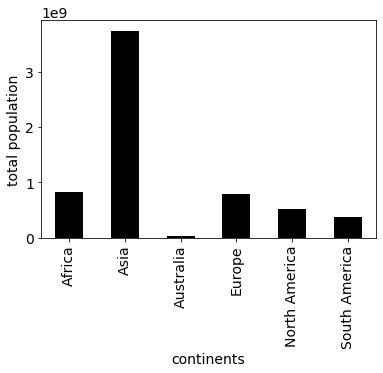

In [33]:
# q26 Plot the total population of each continent? 

matplotlib.rcParams["font.size"] = 14

df_26 = qry ("""
SELECT continent, sum(population) as population
FROM countries
group by continent
order by continent
""")

ax_26 = df_26.plot.bar(x = "continent", y = "population", color = "black", legend = False)
ax_26.set_xlabel("continents")
ax_26.set_ylabel("total population")

### Question 27: What is the *population density (population / area)* of all the *top 7* most dense *countries in Europe*?
- Report these as a Pandas DataFrame sorted in decreasing order of population density. 
- The image below shows the first 3.

In [34]:
#q27 What is the population density (population / area) of all the top 7 most 
# dense countries in Europe. 

qry ("""
SELECT country, population / area as `population density`
FROM countries
WHERE continent = "Europe"
order by `population density` desc
limit 7
""")

,country,population density
0,Monaco,16271
1,Malta,1266
2,San Marino,479
3,Netherlands,397
4,Belgium,339
5,United Kingdom,247
6,Germany,230


<img src="population_density.png">

In [35]:
# Close the connection to the database
conn.close()

### Congratulations, you are all done with work for CS220 course :) Mike and Meena wish you the best of luck for a bright future.